#ASSOCIATION RULES

The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.

###Dataset:
Use the Online retail dataset to apply the association rules.

###Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  


Importing the libraries

In [58]:
!pip install mlxtend

In [59]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Uploading the dataset into a variable

In [61]:
retail = pd.read_excel('/content/Online retail.xlsx',header=None)
retail
# Here the 1st row in the excel file is not the name of the columns.

0
0     shrimp,almonds,avocado,vegetables mix,green gr...
1                                burgers,meatballs,eggs
2                                               chutney
3                                        turkey,avocado
4     mineral water,milk,energy bar,whole wheat rice...
...                                                 ...
7496                      butter,light mayo,fresh bread
7497  burgers,frozen vegetables,eggs,french fries,ma...
7498                                            chicken
7499                                 escalope,green tea
7500    eggs,frozen smoothie,yogurt cake,low fat yogurt

[7501 rows x 1 columns]

##### Converting the data into appropriate format
There is only one column and every row has string-valued data point and data can be splitted from the string by delimiter ','(comma).

In [62]:
retail = retail[0].str.split(pat = ',', expand = True)
retail

0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs              None   
2           chutney               None         None              None   
3            turkey            avocado         None              None   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread              None   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken               None         None              None   
7499       escalope          green tea         None              None   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cottage cheese  energy drink   
1             None              None  None            None          None   
2             None              None  None            None          None   
3             None              None  None            None          None   
4        green tea              None  None            None          None   
...            ...               ...   ...             ...           ...   
7496          None              None  None            None          None   
7497     magazines         green tea  None            None          None   
7498          None              None  None            None          None   
7499          None              None  None            None          None   
7500          None              None  None            None          None   

                9               10         11     12     13             14  \
0     tomato juice  low fat yogurt  green tea  honey  salad  mineral water   
1             None            None       None   None   None           None   
2             None            None       None   None   None           None   
3             None            None       None   None   None           None   
4             None            None       None   None   None           None   
...            ...             ...        ...    ...    ...            ...   
7496          None            None       None   None   None           None   
7497          None            None       None   None   None           None   
7498          None            None       None   None   None           None   
7499          None            None       None   None   None           None   
7500          None            None       None   None   None           None   

          15                 16               17       18         19  
0     salmon  antioxydant juice  frozen smoothie  spinach  olive oil  
1       None               None             None     None       None  
2       None               None             None     None       None  
3       None               None             None     None       None  
4       None               None             None     None       None  
...      ...                ...              ...      ...        ...  
7496    None               None             None     None       None  
7497    None               None             None     None       None  
7498    None               None             None     None       None  
7499    None               None             None     None       None  
7500    None               None             None     None       None  

[7501 rows x 20 columns]

In [63]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


##### Handling the missing values

In [64]:
retail = retail.fillna(value=np.nan)
retail

0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cottage cheese  energy drink   
1              NaN               NaN   NaN             NaN           NaN   
2              NaN               NaN   NaN             NaN           NaN   
3              NaN               NaN   NaN             NaN           NaN   
4        green tea               NaN   NaN             NaN           NaN   
...            ...               ...   ...             ...           ...   
7496           NaN               NaN   NaN             NaN           NaN   
7497     magazines         green tea   NaN             NaN           NaN   
7498           NaN               NaN   NaN             NaN           NaN   
7499           NaN               NaN   NaN             NaN           NaN   
7500           NaN               NaN   NaN             NaN           NaN   

                9               10         11     12     13             14  \
0     tomato juice  low fat yogurt  green tea  honey  salad  mineral water   
1              NaN             NaN        NaN    NaN    NaN            NaN   
2              NaN             NaN        NaN    NaN    NaN            NaN   
3              NaN             NaN        NaN    NaN    NaN            NaN   
4              NaN             NaN        NaN    NaN    NaN            NaN   
...            ...             ...        ...    ...    ...            ...   
7496           NaN             NaN        NaN    NaN    NaN            NaN   
7497           NaN             NaN        NaN    NaN    NaN            NaN   
7498           NaN             NaN        NaN    NaN    NaN            NaN   
7499           NaN             NaN        NaN    NaN    NaN            NaN   
7500           NaN             NaN        NaN    NaN    NaN            NaN   

          15                 16               17       18         19  
0     salmon  antioxydant juice  frozen smoothie  spinach  olive oil  
1        NaN                NaN              NaN      NaN        NaN  
2        NaN                NaN              NaN      NaN        NaN  
3        NaN                NaN              NaN      NaN        NaN  
4        NaN                NaN              NaN      NaN        NaN  
...      ...                ...              ...      ...        ...  
7496     NaN                NaN              NaN      NaN        NaN  
7497     NaN                NaN              NaN      NaN        NaN  
7498     NaN                NaN              NaN      NaN        NaN  
7499     NaN                NaN              NaN      NaN        NaN  
7500     NaN                NaN              NaN      NaN        NaN  

[7501 rows x 20 columns]

##### Removing the Duplicate values

In [65]:
retail.duplicated().sum()
#There are in total 2325 duplicate values

2325

In [66]:
retail[retail.duplicated(keep = False)]

0             1    2    3    4    5    6    7    8    9   \
2               chutney           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3                turkey       avocado  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5        low fat yogurt           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
6     whole wheat pasta  french fries  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9          french fries           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                 ...           ...  ...  ...  ...  ...  ...  ...  ...  ...   
7491      herb & pepper           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
7492          chocolate      escalope  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
7495           pancakes    light mayo  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
7498            chicken           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
7499           escalope     green tea  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       10   11   12   13   14   15   16   17   18   19  
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
7491  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7492  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7495  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7498  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7499  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2713 rows x 20 columns]

In [67]:
retail.drop_duplicates(inplace=True)
retail

0                  1             2                 3   \
0            shrimp            almonds       avocado    vegetables mix   
1           burgers          meatballs          eggs               NaN   
2           chutney                NaN           NaN               NaN   
3            turkey            avocado           NaN               NaN   
4     mineral water               milk    energy bar  whole wheat rice   
...             ...                ...           ...               ...   
7493        burgers             salmon      pancakes      french fries   
7494         turkey            burgers  dessert wine            shrimp   
7496         butter         light mayo   fresh bread               NaN   
7497        burgers  frozen vegetables          eggs      french fries   
7500           eggs    frozen smoothie   yogurt cake    low fat yogurt   

                   4                 5       6               7             8   \
0        green grapes  whole weat flour    yams  cottage cheese  energy drink   
1                 NaN               NaN     NaN             NaN           NaN   
2                 NaN               NaN     NaN             NaN           NaN   
3                 NaN               NaN     NaN             NaN           NaN   
4           green tea               NaN     NaN             NaN           NaN   
...               ...               ...     ...             ...           ...   
7493  frozen smoothie       fresh bread    mint             NaN           NaN   
7494            pasta          tomatoes  pepper            milk      pancakes   
7496              NaN               NaN     NaN             NaN           NaN   
7497        magazines         green tea     NaN             NaN           NaN   
7500              NaN               NaN     NaN             NaN           NaN   

                    9               10               11     12     13  \
0         tomato juice  low fat yogurt        green tea  honey  salad   
1                  NaN             NaN              NaN    NaN    NaN   
2                  NaN             NaN              NaN    NaN    NaN   
3                  NaN             NaN              NaN    NaN    NaN   
4                  NaN             NaN              NaN    NaN    NaN   
...                ...             ...              ...    ...    ...   
7493               NaN             NaN              NaN    NaN    NaN   
7494  whole wheat rice             oil  frozen smoothie    NaN    NaN   
7496               NaN             NaN              NaN    NaN    NaN   
7497               NaN             NaN              NaN    NaN    NaN   
7500               NaN             NaN              NaN    NaN    NaN   

                 14      15                 16               17       18  \
0     mineral water  salmon  antioxydant juice  frozen smoothie  spinach   
1               NaN     NaN                NaN              NaN      NaN   
2               NaN     NaN                NaN              NaN      NaN   
3               NaN     NaN                NaN              NaN      NaN   
4               NaN     NaN                NaN              NaN      NaN   
...             ...     ...                ...              ...      ...   
7493            NaN     NaN                NaN              NaN      NaN   
7494            NaN     NaN                NaN              NaN      NaN   
7496            NaN     NaN                NaN              NaN      NaN   
7497            NaN     NaN                NaN              NaN      NaN   
7500            NaN     NaN                NaN              NaN      NaN   

             19  
0     olive oil  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
7493        NaN  
7494        NaN  
7496        NaN  
7497        NaN  
7500        NaN  

[5176 rows x 20 columns]

In [68]:
retail.duplicated().sum()
# Duplicate values are removed

0

##### Converting the data to appropriate format

In [69]:
items = retail[0].unique()
items

array(['shrimp', 'burgers', 'chutney', 'turkey', 'mineral water',
       'low fat yogurt', 'whole wheat pasta', 'soup', 'frozen vegetables',
       'french fries', 'eggs', 'cookies', 'spaghetti', 'meatballs',
       'red wine', 'rice', 'parmesan cheese', 'ground beef',
       'sparkling water', 'herb & pepper', 'pickles', 'energy bar',
       'fresh tuna', 'escalope', 'avocado', 'tomato sauce',
       'clothes accessories', 'energy drink', 'chocolate',
       'grated cheese', 'yogurt cake', 'mint', 'asparagus', 'champagne',
       'ham', 'muffins', 'french wine', 'chicken', 'pasta', 'tomatoes',
       'pancakes', 'frozen smoothie', 'carrots', 'yams', 'shallot',
       'butter', 'light mayo', 'pepper', 'candy bars', 'cooking oil',
       'milk', 'green tea', 'bug spray', 'oil', 'olive oil', 'salmon',
       'cake', 'almonds', 'salt', 'strong cheese', 'hot dogs', 'pet food',
       'whole wheat rice', 'antioxydant juice', 'honey', 'sandwich',
       'salad', 'magazines', 'protein bar', '

In [70]:
len(items)

115

In [71]:
# One-hot encoding
encoded_vals = []
for index, row in retail.iterrows(): # iterrows() returns index and content for each row
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))# common items
    for uc in uncommons:
        labels[uc] = 0 # assign 0 to uncommon items
    for com in commons:
        labels[com] = 1# assign 1 to common items
    encoded_vals.append(labels)

encoded_vals

[{'clothes accessories': 0,
  'chicken': 0,
  'energy bar': 0,
  'grated cheese': 0,
  'melons': 0,
  'pet food': 0,
  'chocolate': 0,
  'soup': 0,
  'mayonnaise': 0,
  'cereals': 0,
  'dessert wine': 0,
  'red wine': 0,
  'cauliflower': 0,
  'tomato sauce': 0,
  'babies food': 0,
  'white wine': 0,
  'pickles': 0,
  'whole wheat rice': 0,
  'asparagus': 0,
  'brownies': 0,
  'french wine': 0,
  'fresh tuna': 0,
  'strawberries': 0,
  'flax seed': 0,
  'herb & pepper': 0,
  'mint': 0,
  'yogurt cake': 0,
  'parmesan cheese': 0,
  'bug spray': 0,
  'spaghetti': 0,
  'champagne': 0,
  'pepper': 0,
  'soda': 0,
  'salt': 0,
  'strong cheese': 0,
  'chili': 0,
  'corn': 0,
  'ground beef': 0,
  'gums': 0,
  'light cream': 0,
  'butter': 0,
  'rice': 0,
  'sandwich': 0,
  'sparkling water': 0,
  'fromage blanc': 0,
  'hand protein bar': 0,
  'extra dark chocolate': 0,
  'light mayo': 0,
  'turkey': 0,
  'protein bar': 0,
  'ketchup': 0,
  'nonfat milk': 0,
  'oil': 0,
  'cake': 0,
  'shampo

In [72]:
online_Retail = pd.DataFrame(encoded_vals)
online_Retail

clothes accessories  chicken  energy bar  grated cheese  melons  \
0                       0        0           0              0       0   
1                       0        0           0              0       0   
2                       0        0           0              0       0   
3                       0        0           0              0       0   
4                       0        0           1              0       0   
...                   ...      ...         ...            ...     ...   
5171                    0        0           0              0       0   
5172                    0        0           0              0       0   
5173                    0        0           0              0       0   
5174                    0        0           0              0       0   
5175                    0        0           0              0       0   

      pet food  chocolate  soup  mayonnaise  cereals  ...  olive oil  \
0            0          0     0           0        0  ...          1   
1            0          0     0           0        0  ...          0   
2            0          0     0           0        0  ...          0   
3            0          0     0           0        0  ...          0   
4            0          0     0           0        0  ...          0   
...        ...        ...   ...         ...      ...  ...        ...   
5171         0          0     0           0        0  ...          0   
5172         0          0     0           0        0  ...          0   
5173         0          0     0           0        0  ...          0   
5174         0          0     0           0        0  ...          0   
5175         0          0     0           0        0  ...          0   

      cottage cheese  low fat yogurt  salmon  yams  avocado  shrimp  honey  \
0                  1               1       1     1        1       1      1   
1                  0               0       0     0        0       0      0   
2                  0               0       0     0        0       0      0   
3                  0               0       0     0        1       0      0   
4                  0               0       0     0        0       0      0   
...              ...             ...     ...   ...      ...     ...    ...   
5171               0               0       1     0        0       0      0   
5172               0               0       0     0        0       1      0   
5173               0               0       0     0        0       0      0   
5174               0               0       0     0        0       0      0   
5175               0               1       0     0        0       0      0   

      green grapes  green tea  
0                1          1  
1                0          0  
2                0          0  
3                0          0  
4                0          1  
...            ...        ...  
5171             0          0  
5172             0          0  
5173             0          0  
5174             0          1  
5175             0          0  

[5176 rows x 115 columns]

###Visualizations

In [73]:
# most popular items
count = online_Retail.loc[:,:].sum()
count

clothes accessories     61
chicken                434
energy bar             170
grated cheese          363
melons                  82
                      ... 
avocado                238
shrimp                 512
honey                  338
green grapes            68
green tea              876
Length: 115, dtype: int64

In [74]:
count.sort_values(ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

items  count
0    mineral water   1552
1        spaghetti   1188
2             eggs   1077
3        chocolate   1062
4     french fries    997
..             ...    ...
110        chutney     30
111  mashed potato     30
112       sandwich     28
113        bramble     13
114          cream      7

[115 rows x 2 columns]

([<matplotlib.patches.Wedge at 0x794325dab760>,
 [Text(1.080937595241953, 0.20389682487116725, 'mineral water'),
  Text(0.9570020493789593, 0.5423532773796728, 'spaghetti'),
  Text(0.7760401094009743, 0.779590757128972, 'eggs'),
  Text(0.5524395103088897, 0.9512153212862345, 'chocolate'),
  Text(0.3027409435515394, 1.0575197024630434, 'french fries'),
  Text(0.05864278125817271, 1.0984357169203423, 'milk'),
  Text(-0.17265215853575436, 1.0863660672871482, 'green tea'),
  Text(-0.3743865833038884, 1.0343281327712406, 'ground beef'),
  Text(-0.5393616035558505, 0.9586913270754366, 'frozen vegetables'),
  Text(-0.6839775626689013, 0.8614956144783962, 'pancakes'),
  Text(-0.8039862181670031, 0.7507370784752276, 'burgers'),
  Text(-0.8978046217145493, 0.6355681405073693, 'cake'),
  Text(-0.9705024308140726, 0.5178079101210953, 'shrimp'),
  Text(-1.0257531410503486, 0.3972788612868088, 'low fat yogurt'),
  Text(-1.0649190095825656, 0.27558574533108204, 'tomatoes'),
  Text(-1.0890044128224292

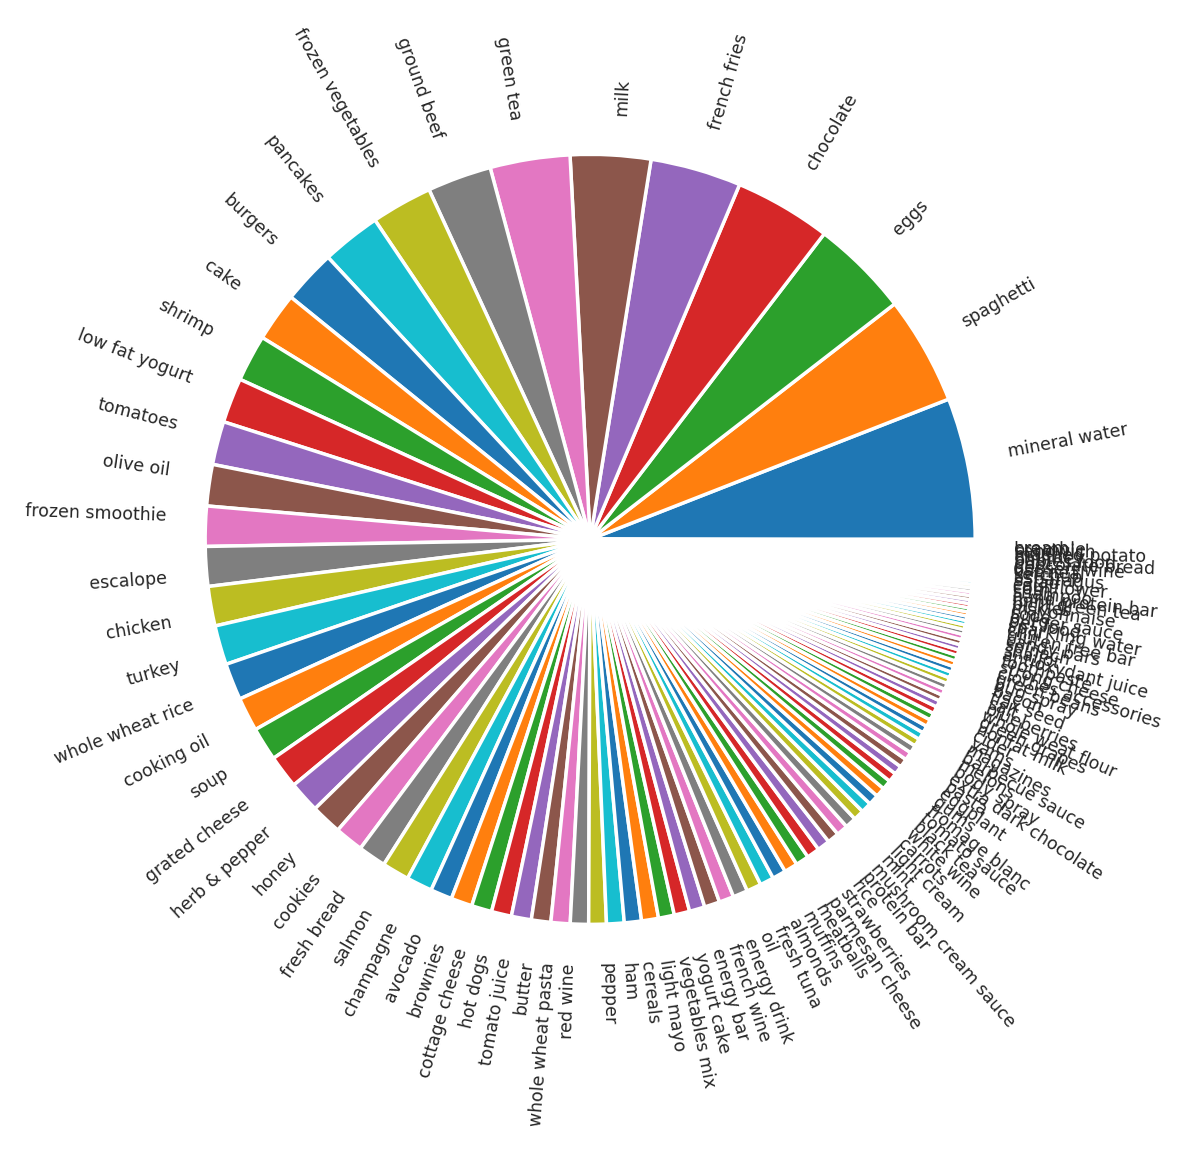

In [75]:
# Pie chart
sns.set_style("whitegrid") # Set style for chart
plt.pie(count['count'], labels=count['items'], rotatelabels = 'True',textprops={'fontsize': 5})

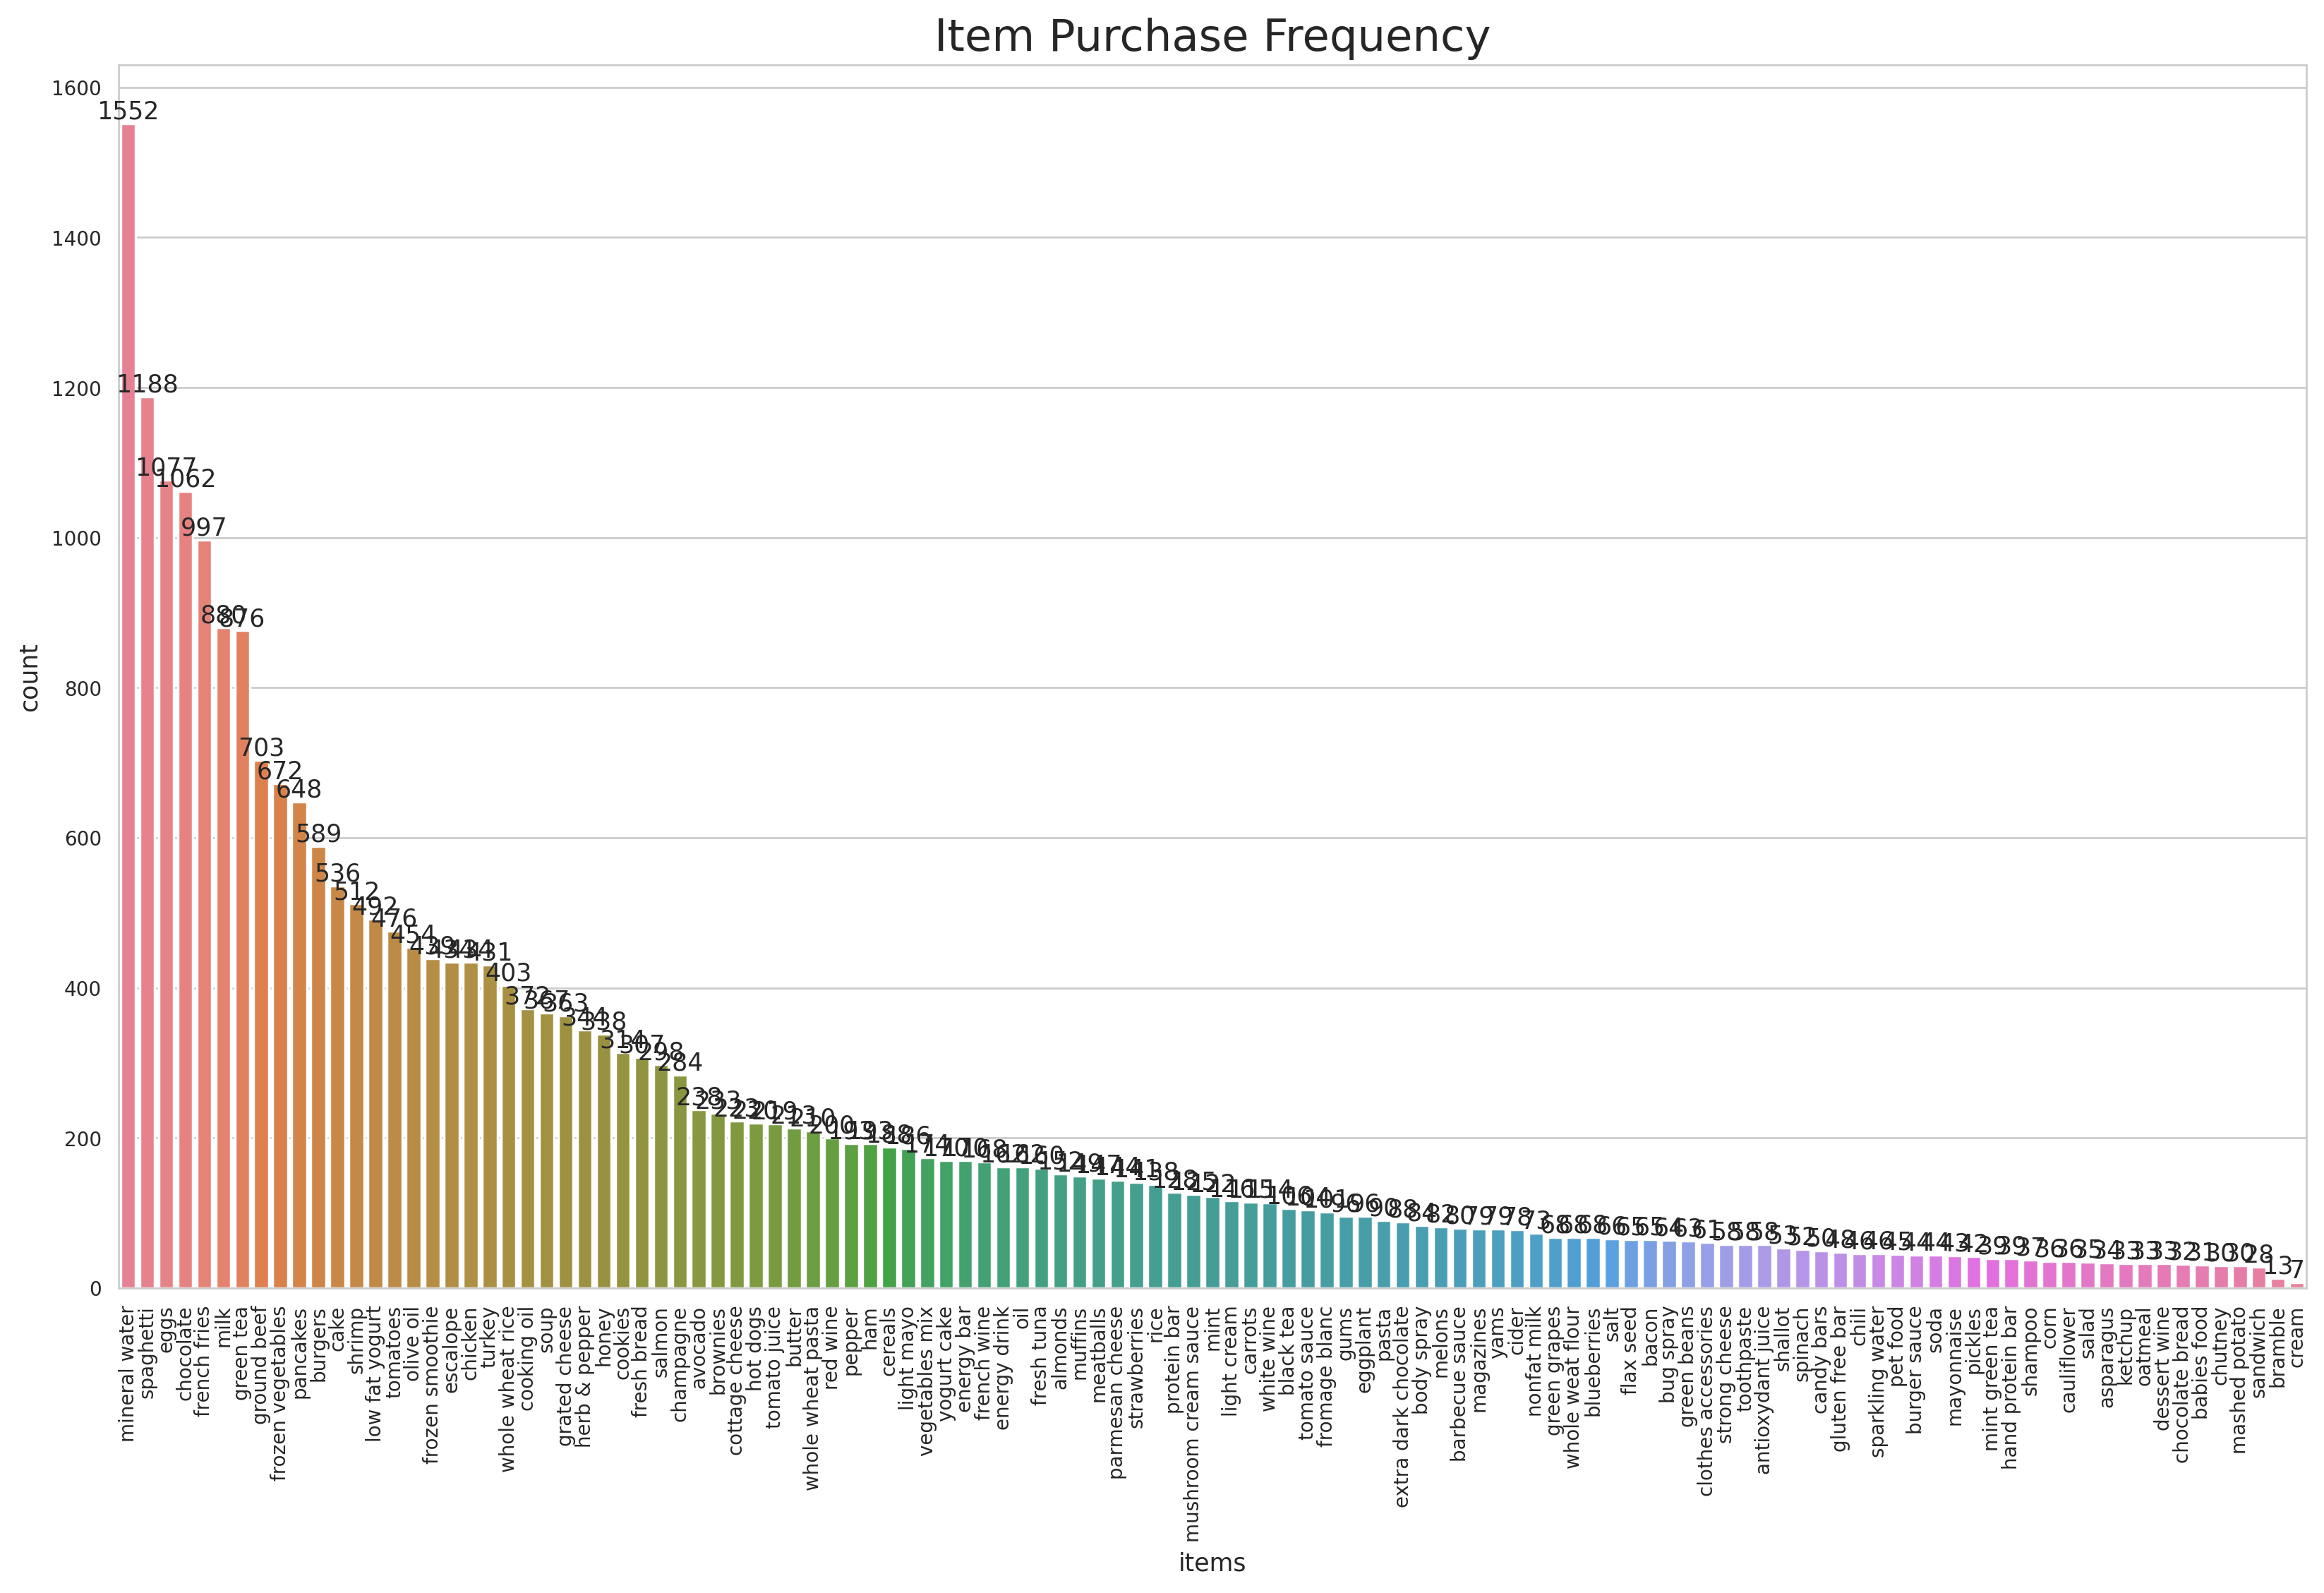

In [76]:
# Bar chart
plt.figure(figsize = (16,9))
ax = sns.barplot(y = 'count', x = 'items', data= count, hue='items' )
plt.yticks(rotation = 0, fontsize = 8)
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Item Purchase Frequency',  fontsize = 18)
for i in ax.containers:
    ax.bar_label(i,)

Here we can clearly see that, how the item purchase frequency changes from mineral water to cream.


##Association Rule Mining:
1. Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
2. Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
3. Set appropriate threshold for support, confidence and lift to extract meaning full rules.


In [77]:
# Minimum support of 1% is set to generate list of one-item sets, two-items sets and three-items sets that meet the support criterion
freq_items = apriori(online_Retail, min_support=0.01, use_colnames=True)
freq_items

support                                    itemsets
0    0.011785                       (clothes accessories)
1    0.083849                                   (chicken)
2    0.032844                                (energy bar)
3    0.070131                             (grated cheese)
4    0.015842                                    (melons)
..        ...                                         ...
432  0.016036    (milk, mineral water, frozen vegetables)
433  0.010433  (shrimp, mineral water, frozen vegetables)
434  0.011978         (mineral water, milk, french fries)
435  0.012365            (olive oil, mineral water, milk)
436  0.011399               (shrimp, mineral water, milk)

[437 rows x 2 columns]

In [78]:
# Minimum threshold of 20% is set
asso_rules_C=association_rules(freq_items, metric = "confidence", min_threshold = 0.2)
asso_rules_C

antecedents      consequents  antecedent support  \
0                     (chicken)      (chocolate)            0.083849   
1                     (chicken)      (spaghetti)            0.083849   
2                     (chicken)           (eggs)            0.083849   
3                     (chicken)           (milk)            0.083849   
4                     (chicken)  (mineral water)            0.083849   
..                          ...              ...                 ...   
351        (french fries, milk)  (mineral water)            0.033810   
352  (olive oil, mineral water)           (milk)            0.038640   
353           (olive oil, milk)  (mineral water)            0.024150   
354     (shrimp, mineral water)           (milk)            0.033617   
355              (shrimp, milk)  (mineral water)            0.025502   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.205178  0.021252    0.253456  1.235301  0.004048    1.064669   
1              0.229521  0.024536    0.292627  1.274946  0.005291    1.089212   
2              0.208076  0.020286    0.241935  1.162728  0.002839    1.044666   
3              0.170015  0.021252    0.253456  1.490783  0.006996    1.111769   
4              0.299845  0.032651    0.389401  1.298672  0.007509    1.146668   
..                  ...       ...         ...       ...       ...         ...   
351            0.299845  0.011978    0.354286  1.181561  0.001841    1.084310   
352            0.170015  0.012365    0.320000  1.882182  0.005795    1.220566   
353            0.299845  0.012365    0.512000  1.707546  0.005124    1.434743   
354            0.170015  0.011399    0.339080  1.994410  0.005683    1.255803   
355            0.299845  0.011399    0.446970  1.490667  0.003752    1.266033   

     zhangs_metric  
0         0.207914  
1         0.235390  
2         0.152763  
3         0.359342  
4         0.251031  
..             ...  
351       0.159039  
352       0.487540  
353       0.424619  
354       0.515943  
355       0.337773  

[356 rows x 10 columns]

In [79]:
asso_rules_C.sort_values('confidence',ascending = False)

antecedents          consequents  \
251                      (soup, milk)      (mineral water)   
310  (ground beef, frozen vegetables)      (mineral water)   
248                 (spaghetti, soup)      (mineral water)   
307           (pancakes, ground beef)      (mineral water)   
190              (chicken, chocolate)      (mineral water)   
..                                ...                  ...   
269                 (spaghetti, eggs)            (burgers)   
123                     (fresh bread)       (french fries)   
40                        (green tea)          (chocolate)   
62                    (herb & pepper)               (milk)   
155                            (milk)  (frozen vegetables)   

     antecedent support  consequent support   support  confidence      lift  \
251            0.021445            0.299845  0.012365    0.576577  1.922913   
310            0.024536            0.299845  0.013331    0.543307  1.811957   
248            0.020672            0.299845  0.010819    0.523364  1.745448   
307            0.020866            0.299845  0.010819    0.518519  1.729286   
190            0.021252            0.299845  0.011012    0.518182  1.728163   
..                  ...                 ...       ...         ...       ...   
269            0.051391            0.113794  0.010433    0.203008  1.783985   
123            0.059312            0.192620  0.011978    0.201954  1.048461   
40             0.169243            0.205178  0.034003    0.200913  0.979216   
62             0.066461            0.170015  0.013331    0.200581  1.179783   
155            0.170015            0.129830  0.034003    0.200000  1.540476   

     leverage  conviction  zhangs_metric  
251  0.005935    1.653557       0.490474  
310  0.005974    1.533097       0.459382  
248  0.004621    1.468952       0.436096  
307  0.004563    1.454167       0.430714  
190  0.004640    1.453151       0.430500  
..        ...         ...            ...  
269  0.004585    1.111937       0.463265  
123  0.000554    1.011697       0.049136  
40  -0.000722    0.994663      -0.024913  
62   0.002031    1.038235       0.163235  
155  0.011930    1.087713       0.422719  

[356 rows x 10 columns]

In [80]:
asso_rules_L=association_rules(freq_items, metric = "lift", min_threshold = 0.5)
asso_rules_L

antecedents              consequents  antecedent support  \
0                (chicken)              (chocolate)            0.083849   
1              (chocolate)                (chicken)            0.205178   
2              (spaghetti)                (chicken)            0.229521   
3                (chicken)              (spaghetti)            0.083849   
4                (chicken)            (ground beef)            0.083849   
..                     ...                      ...                 ...   
955         (shrimp, milk)          (mineral water)            0.025502   
956  (mineral water, milk)                 (shrimp)            0.067813   
957               (shrimp)    (mineral water, milk)            0.098918   
958        (mineral water)           (shrimp, milk)            0.299845   
959                 (milk)  (shrimp, mineral water)            0.170015   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.205178  0.021252    0.253456  1.235301  0.004048    1.064669   
1              0.083849  0.021252    0.103578  1.235301  0.004048    1.022009   
2              0.083849  0.024536    0.106902  1.274946  0.005291    1.025813   
3              0.229521  0.024536    0.292627  1.274946  0.005291    1.089212   
4              0.135819  0.013717    0.163594  1.204502  0.002329    1.033208   
..                  ...       ...         ...       ...       ...         ...   
955            0.299845  0.011399    0.446970  1.490667  0.003752    1.266033   
956            0.098918  0.011399    0.168091  1.699297  0.004691    1.083150   
957            0.067813  0.011399    0.115234  1.699297  0.004691    1.053598   
958            0.025502  0.011399    0.038015  1.490667  0.003752    1.013008   
959            0.033617  0.011399    0.067045  1.994410  0.005683    1.035831   

     zhangs_metric  
0         0.207914  
1         0.239652  
2         0.279895  
3         0.235390  
4         0.185320  
..             ...  
955       0.337773  
956       0.441458  
957       0.456697  
958       0.470124  
959       0.600732  

[960 rows x 10 columns]

In [81]:
asso_rules_L.sort_values('lift',ascending = False)

antecedents            consequents  antecedent support  \
350    (whole wheat pasta)            (olive oil)            0.040572   
351            (olive oil)    (whole wheat pasta)            0.087713   
710  (mineral water, milk)                 (soup)            0.067813   
711                 (soup)  (mineral water, milk)            0.070904   
169          (ground beef)        (herb & pepper)            0.135819   
..                     ...                    ...                 ...   
558       (low fat yogurt)            (green tea)            0.095054   
243        (mineral water)            (champagne)            0.299845   
242            (champagne)        (mineral water)            0.054869   
404              (cookies)        (mineral water)            0.060665   
405        (mineral water)              (cookies)            0.299845   

     consequent support   support  confidence      lift  leverage  conviction  \
350            0.087713  0.011012    0.271429  3.094525  0.007454    1.252159   
351            0.040572  0.011012    0.125551  3.094525  0.007454    1.097180   
710            0.070904  0.012365    0.182336  2.571586  0.007557    1.136281   
711            0.067813  0.012365    0.174387  2.571586  0.007557    1.129085   
169            0.066461  0.022798    0.167852  2.525588  0.013771    1.121843   
..                  ...       ...         ...       ...       ...         ...   
558            0.169243  0.011012    0.115854  0.684542 -0.005075    0.939615   
243            0.054869  0.010819    0.036082  0.657616 -0.005633    0.980511   
242            0.299845  0.010819    0.197183  0.657616 -0.005633    0.872122   
404            0.299845  0.010433    0.171975  0.573544 -0.007757    0.845571   
405            0.060665  0.010433    0.034794  0.573544 -0.007757    0.973197   

     zhangs_metric  
350       0.705471  
351       0.741925  
710       0.655593  
711       0.657774  
169       0.698989  
..             ...  
558      -0.337413  
243      -0.426479  
242      -0.355201  
404      -0.441829  
405      -0.515028  

[960 rows x 10 columns]

In [82]:
asso_rules_L[asso_rules_L.lift >= 1].sort_values('lift',ascending = False)

antecedents                    consequents  \
350            (whole wheat pasta)                    (olive oil)   
351                    (olive oil)            (whole wheat pasta)   
710          (mineral water, milk)                         (soup)   
711                         (soup)          (mineral water, milk)   
169                  (ground beef)                (herb & pepper)   
..                             ...                            ...   
374                      (cookies)                         (eggs)   
510                         (milk)                        (honey)   
511                        (honey)                         (milk)   
902  (mineral water, french fries)                         (eggs)   
903                         (eggs)  (mineral water, french fries)   

     antecedent support  consequent support   support  confidence      lift  \
350            0.040572            0.087713  0.011012    0.271429  3.094525   
351            0.087713            0.040572  0.011012    0.125551  3.094525   
710            0.067813            0.070904  0.012365    0.182336  2.571586   
711            0.070904            0.067813  0.012365    0.174387  2.571586   
169            0.135819            0.066461  0.022798    0.167852  2.525588   
..                  ...                 ...       ...         ...       ...   
374            0.060665            0.208076  0.012751    0.210191  1.010166   
510            0.170015            0.065301  0.011206    0.065909  1.009306   
511            0.065301            0.170015  0.011206    0.171598  1.009306   
902            0.047913            0.208076  0.010046    0.209677  1.007698   
903            0.208076            0.047913  0.010046    0.048282  1.007698   

     leverage  conviction  zhangs_metric  
350  0.007454    1.252159       0.705471  
351  0.007454    1.097180       0.741925  
710  0.007557    1.136281       0.655593  
711  0.007557    1.129085       0.657774  
169  0.013771    1.121843       0.698989  
..        ...         ...            ...  
374  0.000128    1.002678       0.010714  
510  0.000103    1.000651       0.011109  
511  0.000103    1.001910       0.009864  
902  0.000077    1.002027       0.008023  
903  0.000077    1.000388       0.009646  

[840 rows x 10 columns]

# Visualization

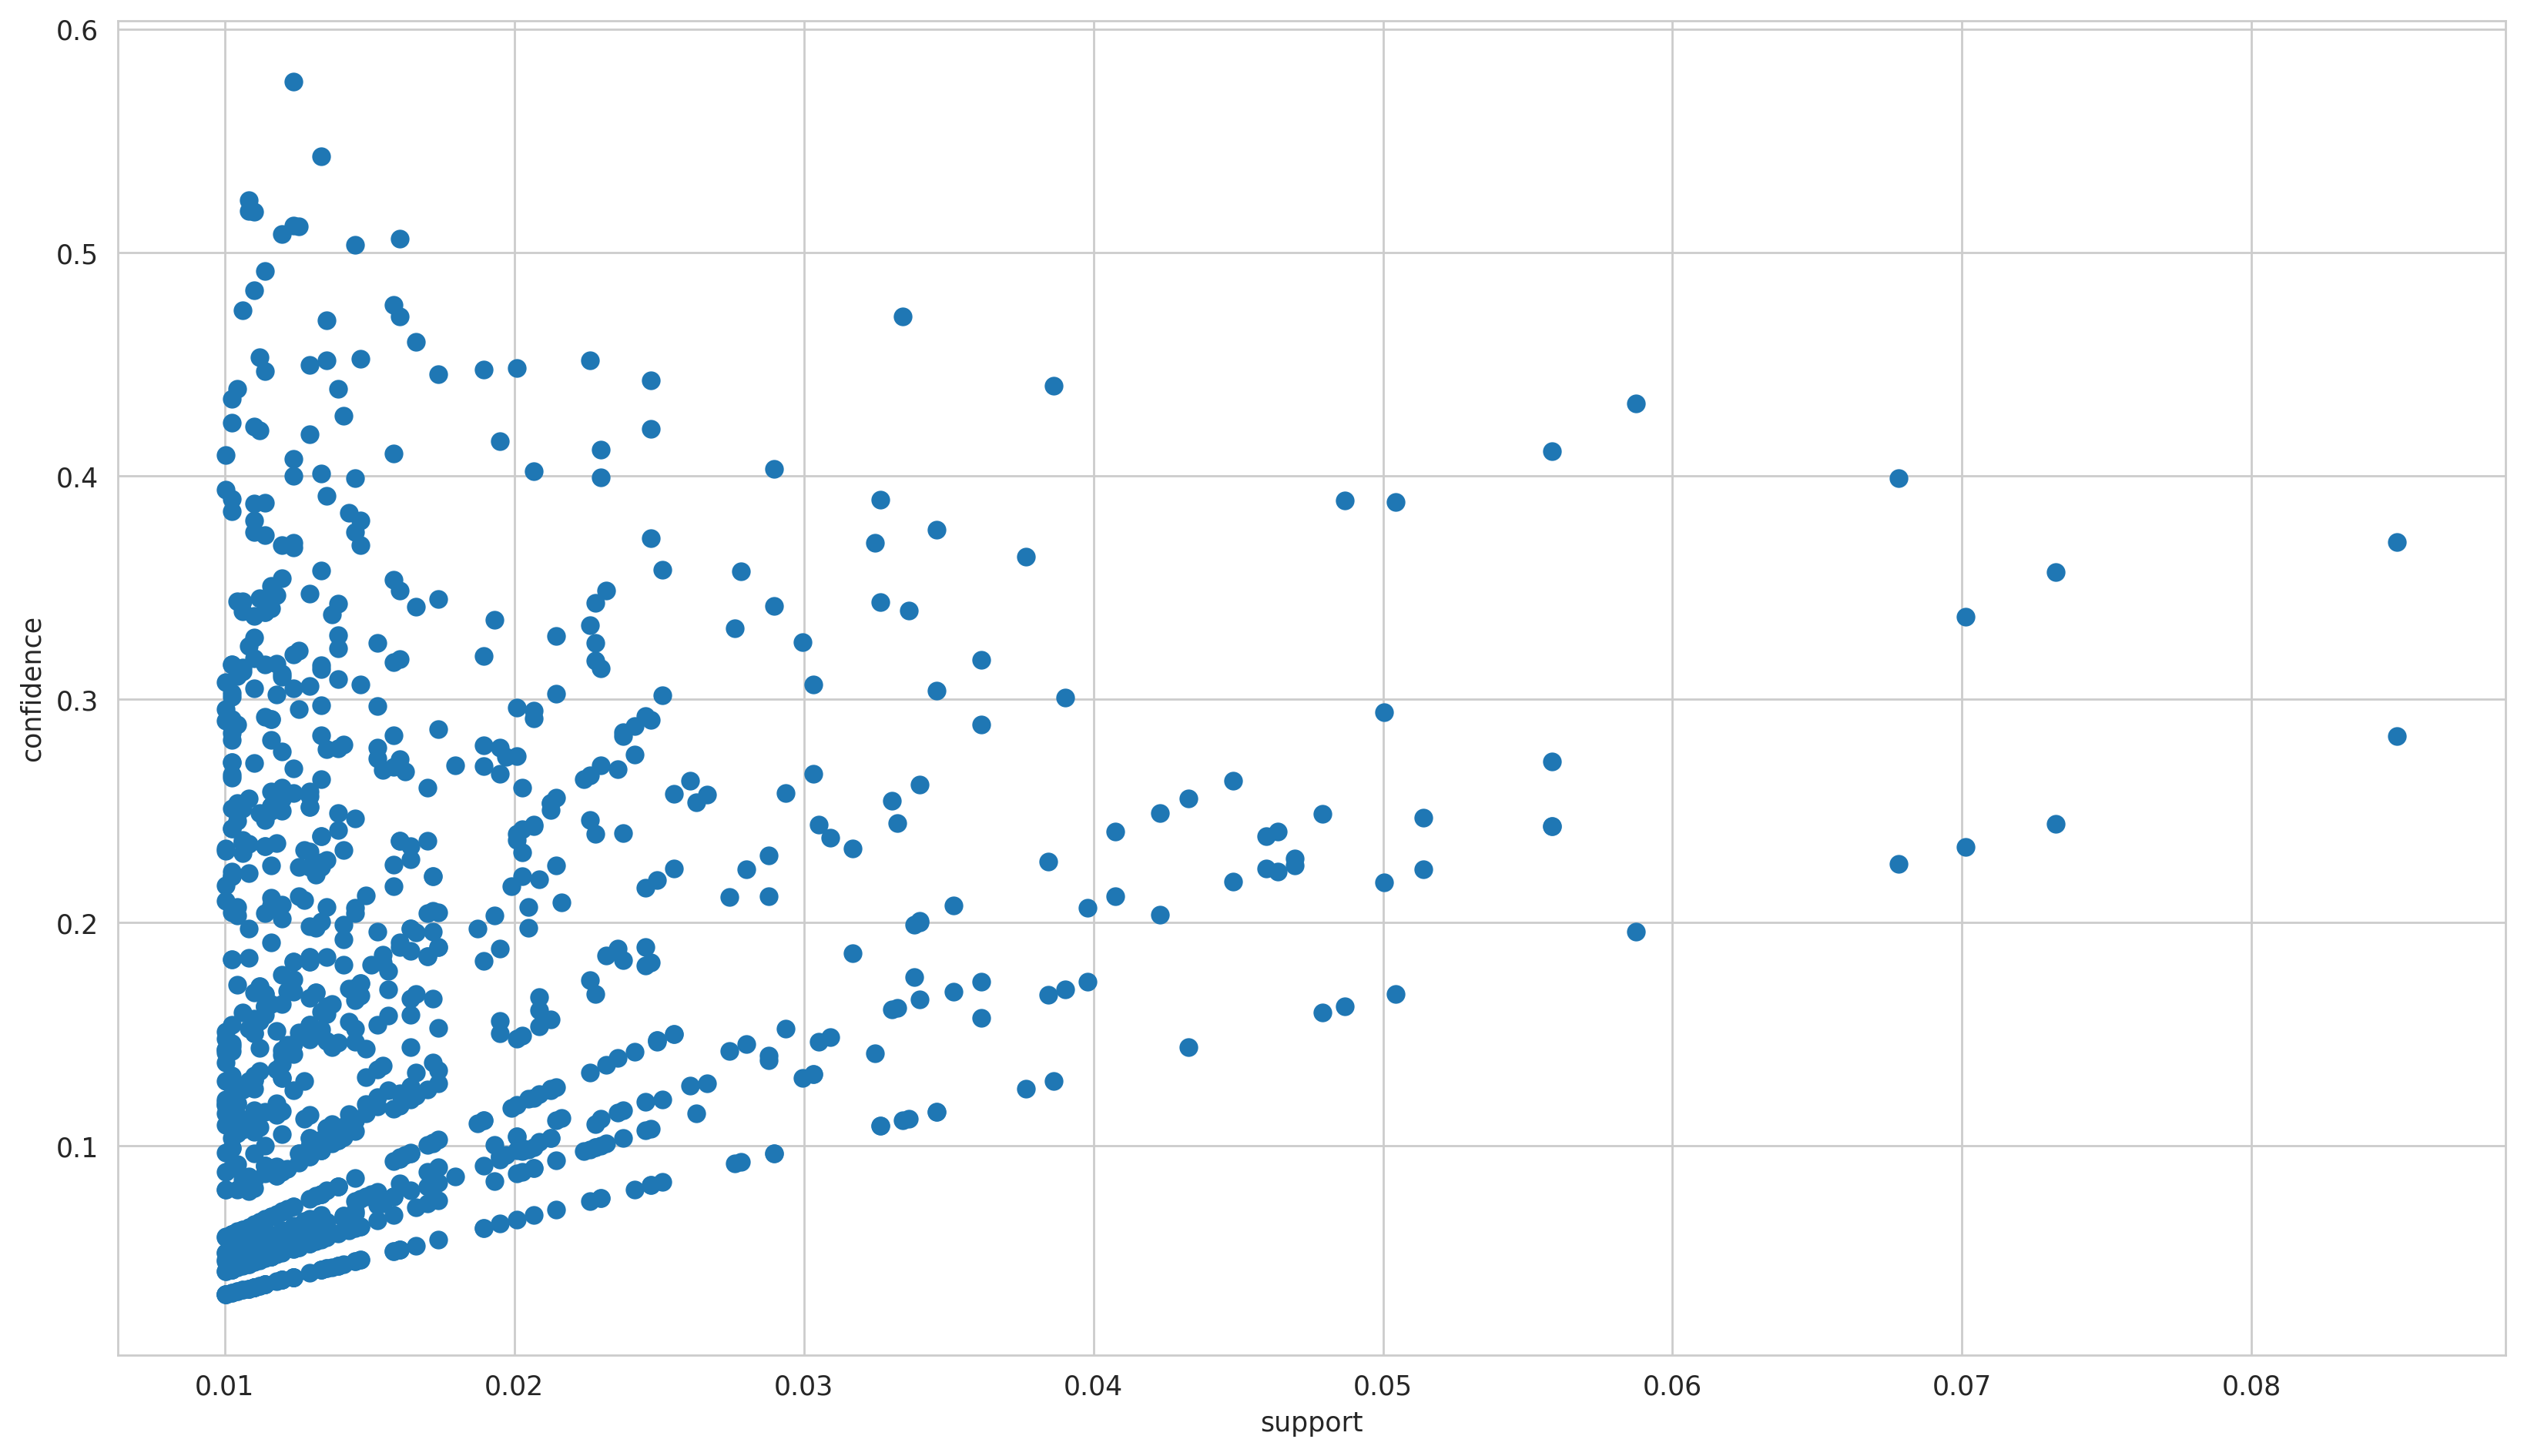

In [83]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(asso_rules_L['support'],asso_rules_L['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [84]:
lift=asso_rules_L[asso_rules_L.lift>1]
matrix = lift.pivot(index='antecedents', columns='consequents', values='lift')
matrix

consequents                  (chocolate)  (shrimp, mineral water)  \
antecedents                                                         
(chicken)                       1.235301                      NaN   
(shrimp, chocolate)                  NaN                      NaN   
(shrimp, mineral water)         1.596597                      NaN   
(olive oil, mineral water)      1.510885                      NaN   
(mineral water, milk)           1.444096                      NaN   
...                                  ...                      ...   
(french wine)                        NaN                      NaN   
(brownies)                           NaN                      NaN   
(cake)                               NaN                      NaN   
(shrimp, frozen vegetables)          NaN                      NaN   
(shrimp, milk)                       NaN                      NaN   

consequents                  (shrimp, chocolate)  (olive oil, mineral water)  \
antecedents                                                                    
(chicken)                                    NaN                         NaN   
(shrimp, chocolate)                          NaN                         NaN   
(shrimp, mineral water)                      NaN                         NaN   
(olive oil, mineral water)                   NaN                         NaN   
(mineral water, milk)                        NaN                         NaN   
...                                          ...                         ...   
(french wine)                                NaN                         NaN   
(brownies)                                   NaN                         NaN   
(cake)                                       NaN                         NaN   
(shrimp, frozen vegetables)                  NaN                         NaN   
(shrimp, milk)                               NaN                         NaN   

consequents                  (mineral water, milk)  \
antecedents                                          
(chicken)                                      NaN   
(shrimp, chocolate)                            NaN   
(shrimp, mineral water)                        NaN   
(olive oil, mineral water)                     NaN   
(mineral water, milk)                          NaN   
...                                            ...   
(french wine)                                  NaN   
(brownies)                                     NaN   
(cake)                                         NaN   
(shrimp, frozen vegetables)                    NaN   
(shrimp, milk)                                 NaN   

consequents                  (mineral water, french fries)  \
antecedents                                                  
(chicken)                                              NaN   
(shrimp, chocolate)                                    NaN   
(shrimp, mineral water)                                NaN   
(olive oil, mineral water)                             NaN   
(mineral water, milk)                                  NaN   
...                                                    ...   
(french wine)                                          NaN   
(brownies)                                             NaN   
(cake)                                                 NaN   
(shrimp, frozen vegetables)                            NaN   
(shrimp, milk)                                         NaN   

consequents                  (french fries, milk)  \
antecedents                                         
(chicken)                                     NaN   
(shrimp, chocolate)                           NaN   
(shrimp, mineral water)                       NaN   
(olive oil, mineral water)                    NaN   
(mineral water, milk)                         NaN   
...                                           ...   
(french wine)                                 NaN   
(brownies)                                    NaN   
(cake)               

(array([  0.5,   2.5,   4.5,   6.5,   8.5,  10.5,  12.5,  14.5,  16.5,
         18.5,  20.5,  22.5,  24.5,  26.5,  28.5,  30.5,  32.5,  34.5,
         36.5,  38.5,  40.5,  42.5,  44.5,  46.5,  48.5,  50.5,  52.5,
         54.5,  56.5,  58.5,  60.5,  62.5,  64.5,  66.5,  68.5,  70.5,
         72.5,  74.5,  76.5,  78.5,  80.5,  82.5,  84.5,  86.5,  88.5,
         90.5,  92.5,  94.5,  96.5,  98.5, 100.5, 102.5, 104.5, 106.5,
        108.5, 110.5, 112.5, 114.5]),
 [Text(0.5, 0, "frozenset({'chocolate'})"),
  Text(2.5, 0, "frozenset({'shrimp', 'chocolate'})"),
  Text(4.5, 0, "frozenset({'mineral water', 'milk'})"),
  Text(6.5, 0, "frozenset({'french fries', 'milk'})"),
  Text(8.5, 0, "frozenset({'frozen vegetables', 'milk'})"),
  Text(10.5, 0, "frozenset({'pancakes', 'chocolate'})"),
  Text(12.5, 0, "frozenset({'milk', 'eggs'})"),
  Text(14.5, 0, "frozenset({'ground beef', 'mineral water'})"),
  Text(16.5, 0, "frozenset({'green tea', 'spaghetti'})"),
  Text(18.5, 0, "frozenset({'olive oil',

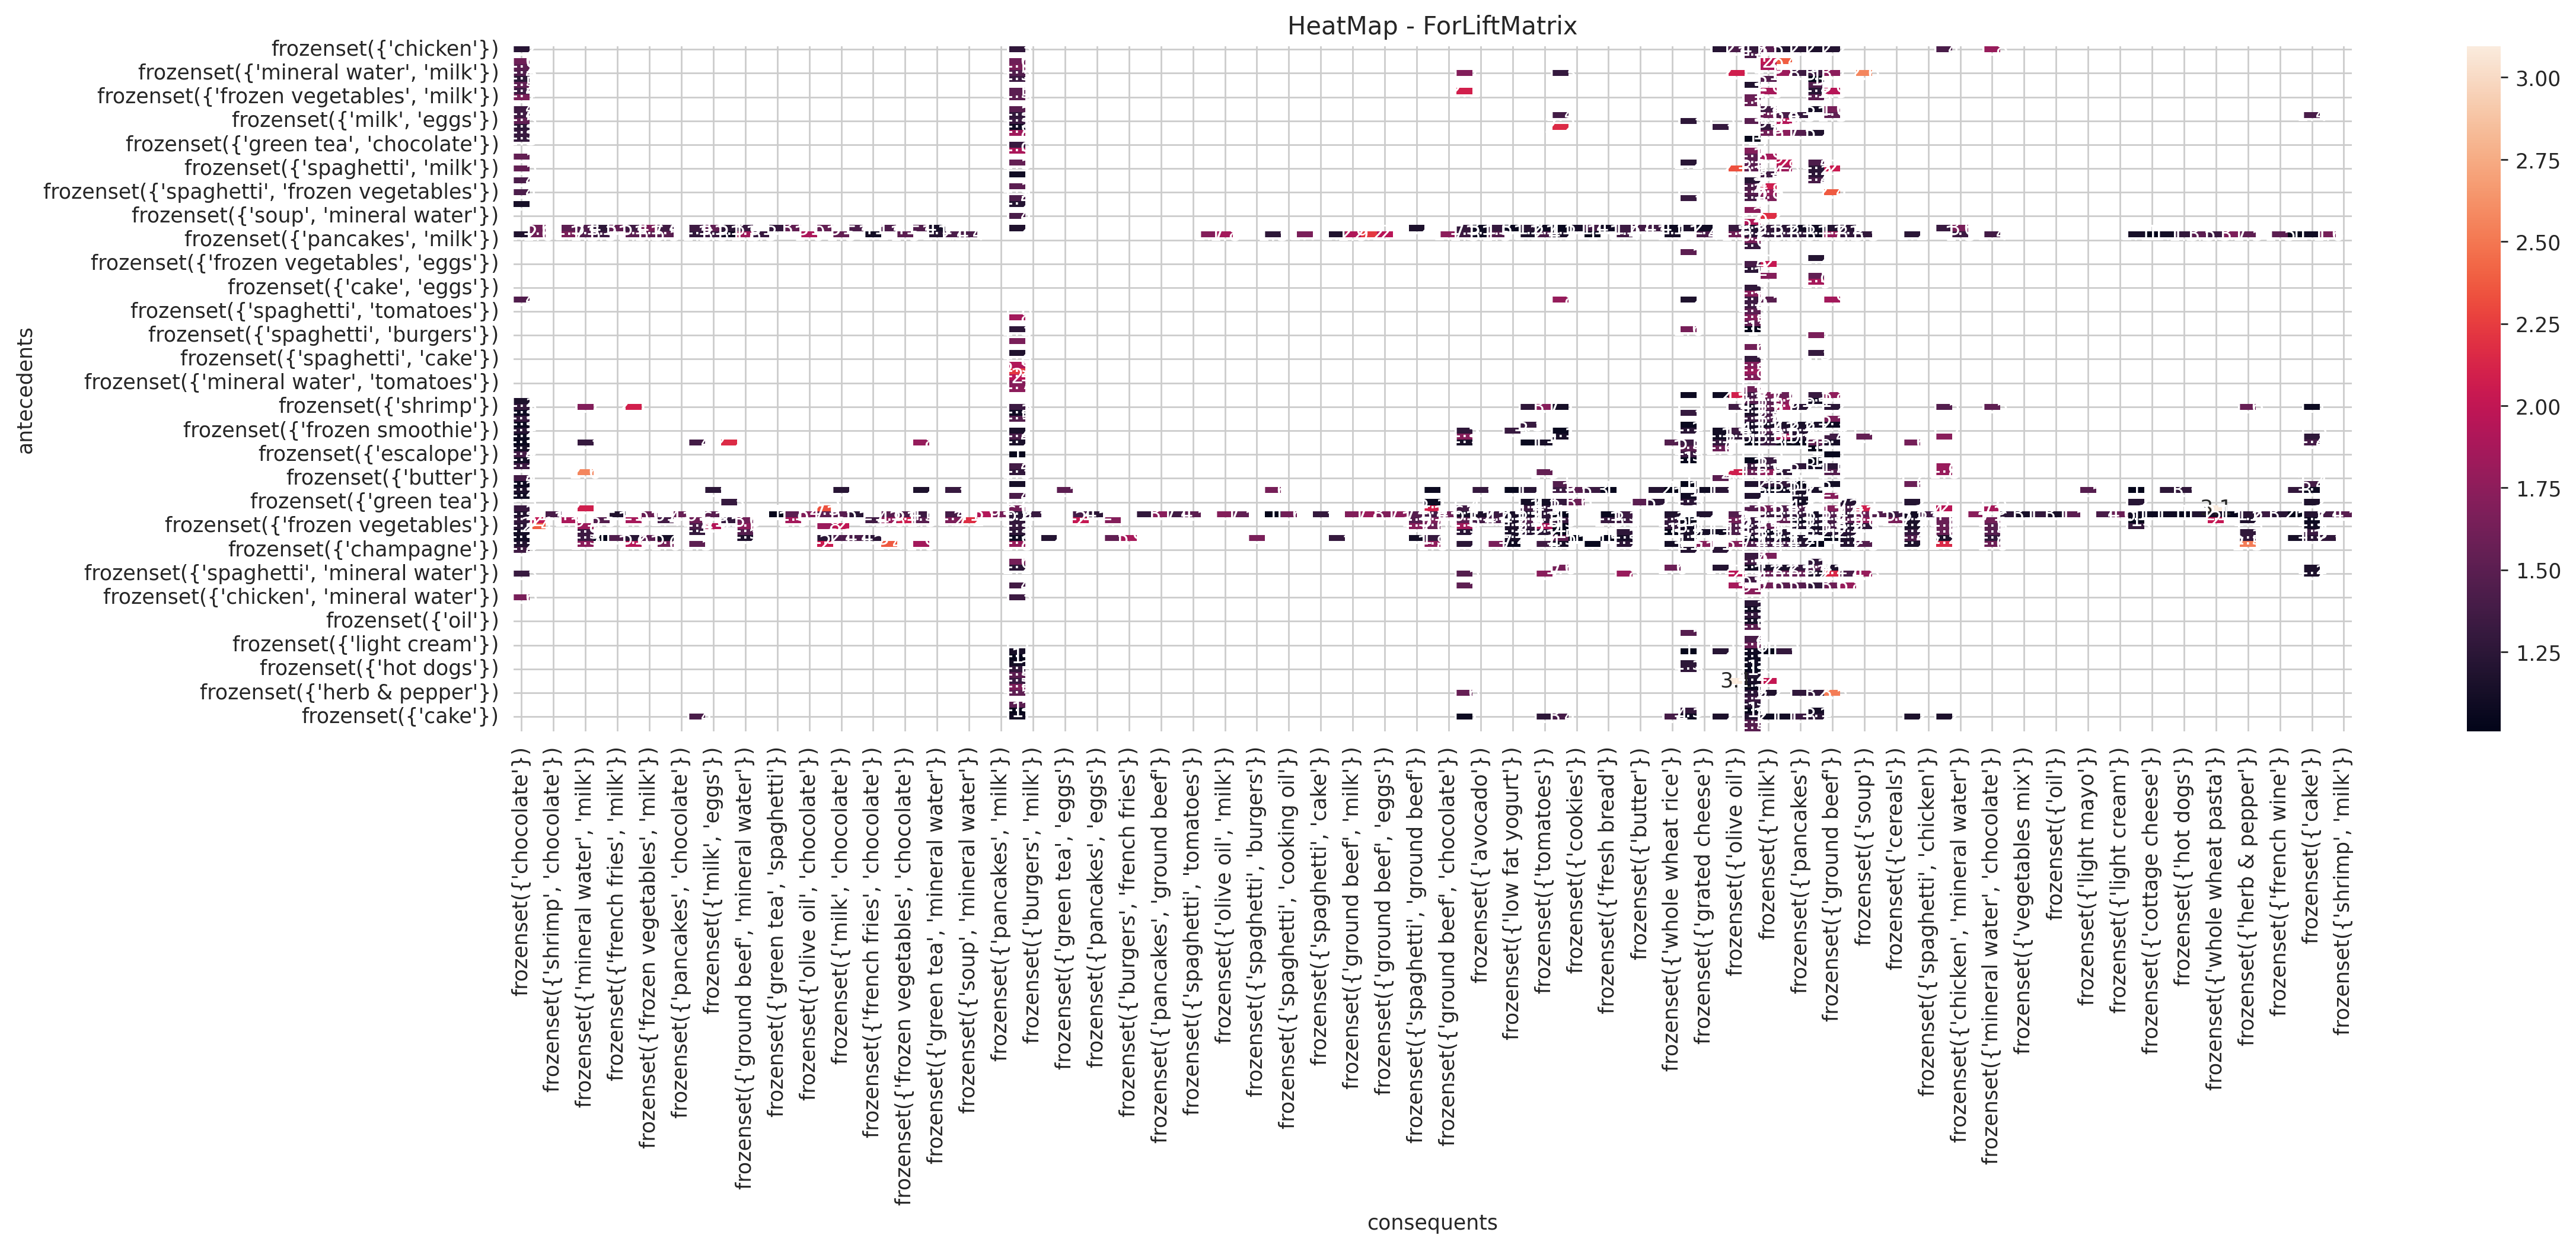

In [85]:
# Heatmap
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

##Analysis and Interpretation:
1. Analyse the generated rules to identify interesting patterns and relationships between the products.
2. Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


According to the lift ratio, we can see that,

[Whole Wheat, Pasta] => [Olive Oil] (Support=1%, confidence=27%)

This means that there is a 1% transaction that bought Whole Wheat, Pasta and Olive oil together and there are 27% of the customers who bought Whole Wheat, Pasta as well as Olive oil.

Accordingly, the above table shows such facts with the lift and confidence percentage.

Lift > 1 indicates that a rule is useful in finding consequent item sets.

## Interview Questions:
1.	What is lift and why is it important in Association rules?
2.	What is support and Confidence. How do you calculate them?
3.	What are some limitations or challenges of Association rules mining?


Answers:


1. Lift is a measure that tells how likely item B is purchased when item A is purchases. and vice versa. If the value of lift ratio is greater than 1 then this indicates a rule is useful in finding consequent items sets. Lift is important in associatio rules to find particular consequents importance.


2. Support measures the overall impact. It is a percentage of transactions inwhich antecedent and consequent appear in whole data. Whereas, Confidence shows the rate at which consequents will be found. It is a percentage of antecedent transactions that also have the consequent item set.
Formula:
* Support = transaction with both antecedent and cosequent item sets /
total transactions
* Confidence = transaction with both antecendet and consequentitem sets /transaction with antecedent item set

3. Random data can generate different association rules, so more rule you produce there is greater danger on implementing. So, there should not be more rules. It can be happen that, in the set of antecednet and consequent there might be the same item values for different combinations, in such a scenario to minimize the similar rule, the one which having the minimum lift ratio must be discarded.